In [40]:
import numpy as np
import matplotlib.pyplot as plt
from utils.metrics import *

tval = np.array( [1,2,3,4,5])
est = np.array([2,3,4,5,6])
est2 = np.array([2.6, 2.8, 3, 3.2, 3.4])



In [37]:
print("MAE OF TVAL OVER EST", MAE(tval, est))
print("MAE OF TVAL OVER EST2", MAE(tval, est2))
print("SLOPE OF TVAL OVER EST", 1/2*(np.std(tval)/np.std(est) + np.std(est)/np.std(tval)))
print("SLOPE OF TVAL OVER EST2", 1/2*(np.std(tval)/np.std(est2) + np.std(est2)/np.std(tval)))

MAE OF TVAL OVER EST 1.0
MAE OF TVAL OVER EST2 0.96
SLOPE OF TVAL OVER EST 1.0
SLOPE OF TVAL OVER EST2 2.6


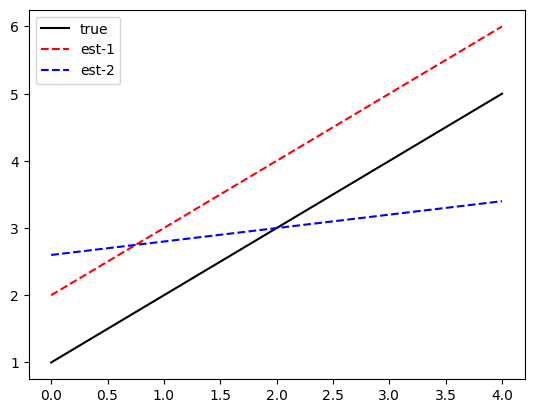

In [38]:
# graph
x1 = [k for k in range(5)]
X = np.array([[k] for k in range(5)])

plt.plot(x1, tval, 'k', label='true')
plt.plot(x1, est,'r--', label='est-1')
plt.plot(x1, est2,'b--', label='est-2')
plt.legend()
plt.show()

In [4]:
get_slope(X, tval)

0.39999999999999997

In [5]:
get_slope(X, est2)

0.4

In [1]:
# smooth - 401
import numpy as np
import pandas as pd

In [2]:
dataset_path = './dataset/exchange_rate/exchange_rate.csv'

df_exchange = pd.read_csv(dataset_path)
df_exchange = df_exchange.drop(columns=['date'])

In [4]:
np_exchange = df_exchange.to_numpy()

In [5]:
np_extended_401 = np.pad(np_exchange[:,:], pad_width=200, mode='edge') # 좌우로 2칸 연장
np_extended_401 = np_extended_401[:, 200:-200]

In [6]:
np_extended_401 = np.array([[np.mean(np_extended_401[i:i+401, j]) for j in range(8)] for i in range(7588)])

In [7]:
dataset_path = './dataset/exchange_rate/exchange_rate.csv'

df_exchange_date = pd.read_csv(dataset_path)
df_exchange_date = df_exchange_date[['date']]

In [8]:
df_ex_401 = pd.DataFrame(np_extended_401, columns = df_exchange.columns)
df_ex_401 = pd.concat([df_exchange_date, df_ex_401], axis=1)
df_ex_401.to_csv('./dataset/exchange_rate/exchange_rate_401mean.csv', index=False)

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# 5, 25, 101 호출
df_ex_5 = pd.read_csv('./dataset/exchange_rate/exchange_rate_5mean.csv')
df_ex_25 = pd.read_csv('./dataset/exchange_rate/exchange_rate_25mean.csv')
df_ex_101 = pd.read_csv('./dataset/exchange_rate/exchange_rate_101mean.csv')
np_extended_5 = df_ex_5.drop(columns=['date']).to_numpy()
np_extended_25 = df_ex_25.drop(columns=['date']).to_numpy()
np_extended_101 = df_ex_101.drop(columns=['date']).to_numpy()

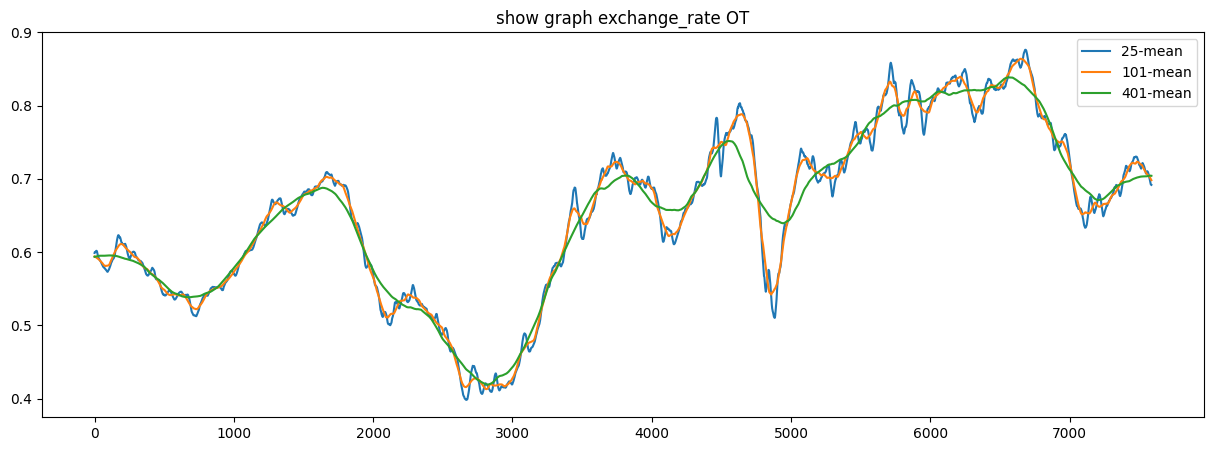

In [19]:
var = 7
plt.figure(figsize=(15,5))
xr = range(len(np_extended_401))
# plt.plot(xr, np_extended_5[:, var], label='5-mean')
plt.plot(xr, np_extended_25[:, var], label='25-mean')
plt.plot(xr, np_extended_101[:, var], label='101-mean')
plt.plot(xr, np_extended_401[:, var], label='401-mean')
plt.legend()
plt.title('show graph exchange_rate OT')
plt.show()

In [ ]:
# 400 데이터 예측 정확도 측정


In [ ]:
# 그래프 그리기

coef_graph = {
    "1.0-0.0": {}
    "0.9-0.1":
}

In [ ]:
# coefficinets graph 그리기
import matplotlib.pyplot as plt



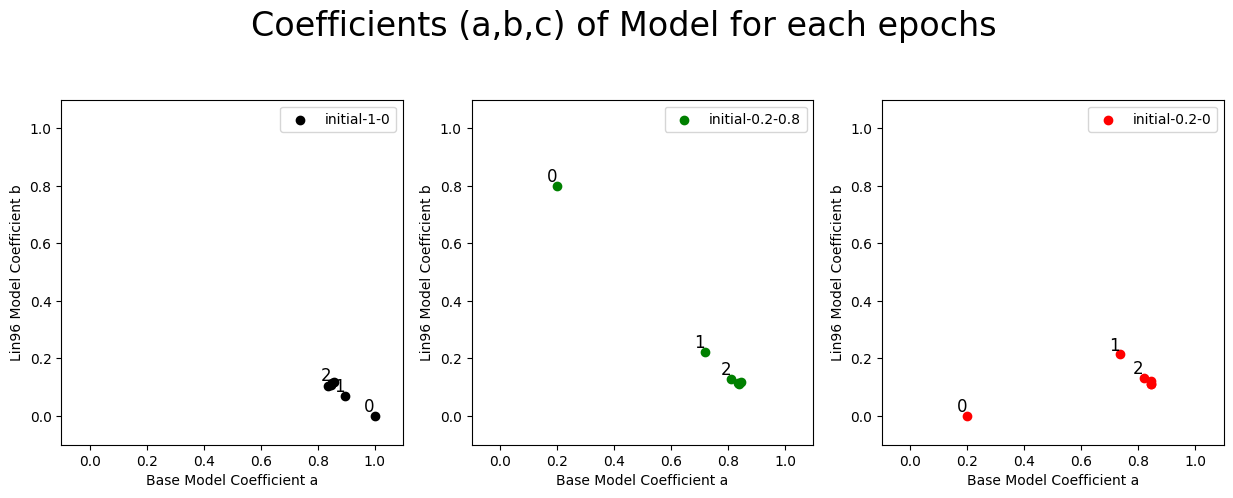

In [91]:
# 4*2 그래프 그리기
# iTransformer 예측, linear예측, 실제값 
idx = 0
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 5행 10열 서브플롯, figure 크기 조정
plt.subplots_adjust(wspace=0.2, hspace=2, top=0.8)

coef_10_0_0 = [(1, 0), (0.89628476, 0.0700596), (0.84697723, 0.10750032), (0.83690286, 0.10501885), (0.856244, 0.11912978), (0.85041153, 0.11596981)]
coef_2_8_0 = [(0.2, 0.8), (0.7175711, 0.22341913), (0.8118725, 0.12993261), (0.8353155, 0.11491278), (0.84692144, 0.117428616), (0.8400437, 0.11100427)]
coef_2_0_8 = [(0.2, 0), (0.73585045, 0.21387315), (0.8195565, 0.13303298), (0.8453599, 0.12081861), (0.84483856, 0.11108283), (0.84396356, 0.110306054)]

x_0, y_0 = list(map(lambda x: x[0], coef_10_0_0)),list(map(lambda x: x[1], coef_10_0_0))
x_1, y_1 = list(map(lambda x: x[0], coef_2_8_0)),list(map(lambda x: x[1], coef_2_8_0))
x_2, y_2 = list(map(lambda x: x[0], coef_2_0_8)),list(map(lambda x: x[1], coef_2_0_8))

axs[0].scatter(x_0, y_0, c='k', label="initial-1-0")   # 예제: 서로 다른 사인 곡선 플롯
axs[1].scatter(x_1, y_1, c='g', label="initial-0.2-0.8") 
axs[2].scatter(x_2, y_2, c='r', label="initial-0.2-0")

for i in range(3):
    axs[0].text(x_0[i], y_0[i], f'{i}', fontsize=12, ha='right', va='bottom')
    axs[1].text(x_1[i], y_1[i], f'{i}', fontsize=12, ha='right', va='bottom')
    axs[2].text(x_2[i], y_2[i], f'{i}', fontsize=12, ha='right', va='bottom')
# x, y axis 범위 지정
axs[0].set_xlim(-0.1, 1.1)  
axs[0].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)  
axs[1].set_ylim(-0.1, 1.1)  
axs[2].set_xlim(-0.1, 1.1)  
axs[2].set_ylim(-0.1, 1.1)  
axs[0].set_xlabel("Base Model Coefficient a")
axs[0].set_ylabel("Lin96 Model Coefficient b")
axs[1].set_xlabel("Base Model Coefficient a")
axs[1].set_ylabel("Lin96 Model Coefficient b")
axs[2].set_xlabel("Base Model Coefficient a")
axs[2].set_ylabel("Lin96 Model Coefficient b")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.suptitle("Coefficients (a,b,c) of Model for each epochs", fontsize=24)

plt.savefig('aux_graph_coefficients.png')
plt.show()

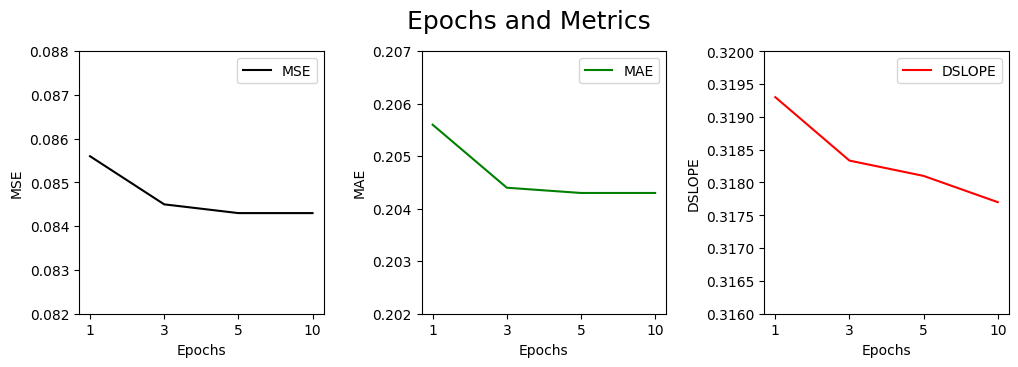

In [100]:
# epochs 
xr = list(range(4)) # 0,1,2,3

fig, axs = plt.subplots(1, 3, figsize=(12,3.5))  # 5행 10열 서브플롯, figure 크기 조정
plt.subplots_adjust(wspace=0.4, top=0.86)

mse_map = [0.0856, 0.0845, 0.0843, 0.0843]
mae_map = [0.2056, 0.2044, 0.2043, 0.2043]
sme_map = [np.mean([-0.061, -0.0608, -0.0627]), np.mean([-0.0589, -0.0591, -0.0592]), np.mean([-0.0591, -0.0588, -0.0593]), -0.0595]
dslope_map = [np.mean([0.3194, 0.3196, 0.3189]), np.mean([0.3186, 0.3183, 0.3181]), np.mean([0.3182, 0.3183, 0.3178]), 0.3177]


axs[0].plot(xr, mse_map, c='k', label="MSE")   # 예제: 서로 다른 사인 곡선 플롯
axs[1].plot(xr, mae_map, c='g', label="MAE") 
axs[2].plot(xr, dslope_map, c='r', label="DSLOPE")

# x, y axis 범위 지정
axs[0].set_xticks(xr, ["1", "3", "5", "10"])  
axs[1].set_xticks(xr, ["1", "3", "5", "10"])  
axs[2].set_xticks(xr, ["1", "3", "5", "10"])
axs[0].set_ylim(0.082, 0.088)  
axs[1].set_ylim(0.202, 0.207)  
axs[2].set_ylim(0.316, 0.32) 
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("MSE")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("MAE")
axs[2].set_xlabel("Epochs")
axs[2].set_ylabel("DSLOPE")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.suptitle("Epochs and Metrics", fontsize=18)

plt.savefig('aux_graph_epochs_metric.png')
plt.show()

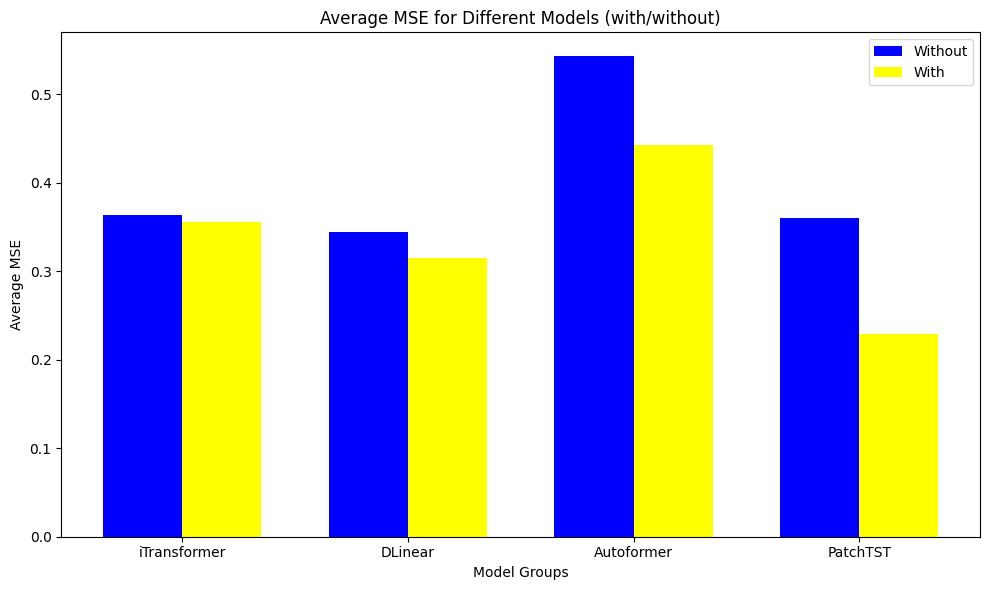

In [78]:
# graph 그리기 - 
import numpy as np
import matplotlib.pyplot as plt

# 데이터 정리
data = {
    "iTransformer (without)": [0.0879, 0.1821, 0.3351, 0.8473],
    "iTransformer (with)": [0.0862, 0.1783, 0.3238, 0.8361],
    "DLinear (without)": [0.0835, 0.1700, 0.3111, 0.8146],
    "DLinear (with)": [0.0827, 0.1654, 0.3006, 0.7117],
    "Autoformer (without)": [0.1611, 0.2996, 0.6037, 1.1075],
    "Autoformer (with)": [0.1026, 0.2172, 0.4723, 0.9792],
    "PatchTST (without)": [0.0849, 0.1763, 0.3332, 0.8487],
    "PatchTST (with)": [0.0828, 0.1755, 0.3291, 0.3300]
}

# 평균값 계산
group_names = ["iTransformer", "DLinear", "Autoformer", "PatchTST"]
without_means = [np.mean(data[f"{name} (without)"]) for name in group_names]
with_means = [np.mean(data[f"{name} (with)"]) for name in group_names]

# 히스토그램 그리기
x = np.arange(len(group_names))  # 그룹의 위치

fig, ax = plt.subplots(figsize=(10, 6))

# 각 그룹별로 두 개의 바 추가
width = 0.35  # 바의 너비
ax.bar(x - width/2, without_means, width, label='Without', color='blue')
ax.bar(x + width/2, with_means, width, label='With', color='yellow')

# x축 라벨 및 범위 설정
ax.set_xlabel('Model Groups')
ax.set_ylabel('Average MSE')
ax.set_title('Average MSE for Different Models (with/without)')
ax.set_xticks(x)
ax.set_xticklabels(group_names)

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


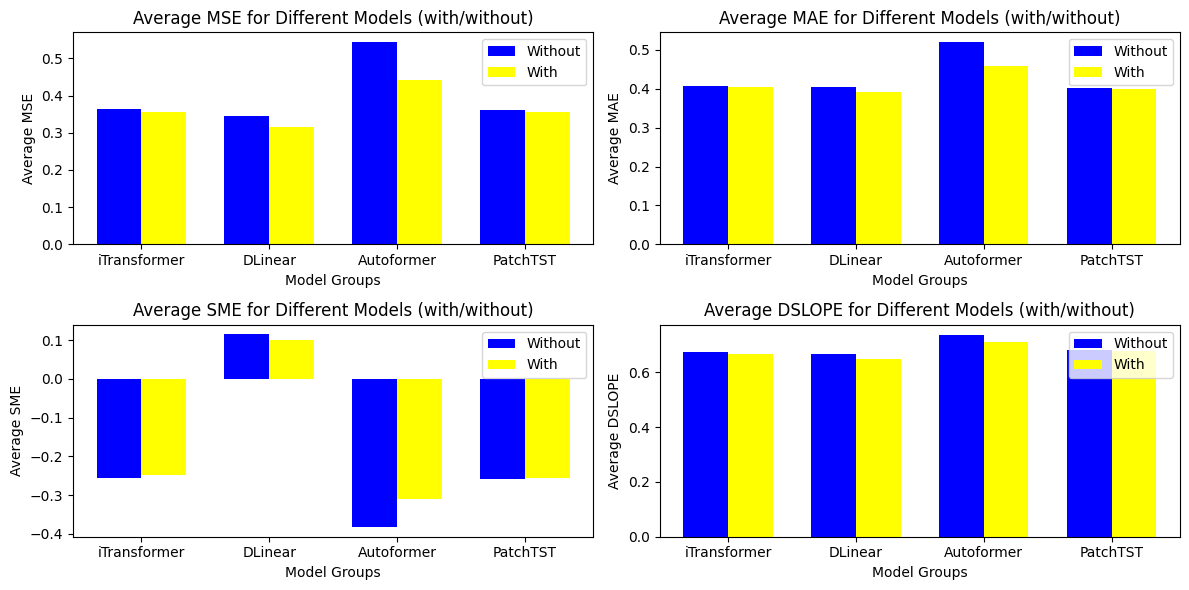

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 정리
metrics_data = {
    "MSE": {
        "iTransformer (without)": [0.0879, 0.1821, 0.3351, 0.8473],
        "iTransformer (with)": [0.0862, 0.1783, 0.3238, 0.8361],
        "DLinear (without)": [0.0835, 0.1700, 0.3111, 0.8146],
        "DLinear (with)": [0.0827, 0.1654, 0.3006, 0.7117],
        "Autoformer (without)": [0.1611, 0.2996, 0.6037, 1.1075],
        "Autoformer (with)": [0.1026, 0.2172, 0.4723, 0.9792],
        "PatchTST (without)": [0.0849, 0.1763, 0.3332, 0.8487],
        "PatchTST (with)": [0.0828, 0.1755, 0.3291, 0.8410]
    },
    "MAE": {
        "iTransformer (without)": [0.2085, 0.3051, 0.4208, 0.6974],
        "iTransformer (with)": [0.2065, 0.3020, 0.4129, 0.6922],
        "DLinear (without)": [0.2093, 0.3068, 0.4210, 0.6828],
        "DLinear (with)": [0.2075, 0.3022, 0.4128, 0.6474],
        "Autoformer (without)": [0.2905, 0.4000, 0.5711, 0.8161],
        "Autoformer (with)": [0.2325, 0.3385, 0.4996, 0.7626],
        "PatchTST (without)": [0.2021, 0.2977, 0.4170, 0.6930],
        "PatchTST (with)": [0.2002, 0.2971, 0.4143, 0.6892]
    },
    "SME": {
        "iTransformer (without)": [-0.0678, -0.1381, -0.2462, -0.5764],
        "iTransformer (with)": [-0.0652, -0.1308, -0.2277, -0.5692],
        "DLinear (without)": [-0.0007, 0.0475, 0.1107, 0.3000],
        "DLinear (with)": [-0.0017, 0.0454, 0.1070, 0.2541],
        "Autoformer (without)": [-0.1624, -0.2397, -0.4355, -0.6935],
        "Autoformer (with)": [-0.0821, -0.1673, -0.3489, -0.6388],
        "PatchTST (without)": [-0.0746, -0.1372, -0.2508, -0.5752],
        "PatchTST (with)": [-0.0696, -0.1358, -0.2458, -0.5698]
    },
    "DSLOPE": {
        "iTransformer (without)": [0.3203, 0.4813, 0.6887, 1.2021],
        "iTransformer (with)": [0.3184, 0.4767, 0.6735, 1.1906],
        "DLinear (without)": [0.3193, 0.4885, 0.6796, 1.1774],
        "DLinear (with)": [0.3131, 0.4802, 0.6675, 1.1353],
        "Autoformer (without)": [0.3442, 0.5302, 0.8764, 1.1928],
        "Autoformer (with)": [0.3562, 0.5262, 0.8121, 1.1409],
        "PatchTST (without)": [0.3244, 0.4870, 0.6935, 1.2193],
        "PatchTST (with)": [0.3220, 0.4859, 0.6881, 1.2104]
    }
}

group_names = ["iTransformer", "DLinear", "Autoformer", "PatchTST"]

# 각 메트릭에 대한 subplot을 생성하여 히스토그램 그리기
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

metric_names = ["MSE", "MAE", "SME", "DSLOPE"]

for ax, metric in zip(axs.flat, metric_names):
    # 평균값 계산
    without_means = [np.mean(metrics_data[metric][f"{name} (without)"]) for name in group_names]
    with_means = [np.mean(metrics_data[metric][f"{name} (with)"]) for name in group_names]

    x = np.arange(len(group_names))  # 그룹의 위치

    # 각 그룹별로 두 개의 바 추가
    width = 0.35  # 바의 너비
    ax.bar(x - width/2, without_means, width, label='Without', color='blue')
    ax.bar(x + width/2, with_means, width, label='With', color='yellow')

    # x축 라벨 및 범위 설정
    ax.set_xlabel('Model Groups')
    ax.set_ylabel(f'Average {metric}')
    ax.set_title(f'Average {metric} for Different Models (with/without)')
    ax.set_xticks(x)
    ax.set_xticklabels(group_names)
    
    # 범례 추가
    ax.legend()

# 전체 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.savefig("aux_total_results.png")
plt.show()
